## Essai

$$ν = \frac{1}{2} $$

In [1]:
import sympy as sp
from sympy.physics.quantum import Bra, Ket
from sympy import Matrix
from sympy.physics.quantum import TensorProduct
from sympy.physics.quantum.gate import HadamardGate,CNotGate, IdentityGate
from sympy.physics.quantum.qapply import qapply
from sympy import eye

from sympy.physics.quantum import Ket
from sympy import sqrt

sp.init_printing()

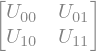

In [2]:
U00 = sp.Symbol("U00", complex=True)
U01 = sp.Symbol("U01", complex=True)
U10 = sp.Symbol("U10", complex=True)
U11 = sp.Symbol("U11", complex=True)
U = Matrix([[U00, U01], [U10, U11]])

# F1 is Set to 0
dF1 = {U00: 1, U01: 1, U10: 0, U11: 0}
#F2 is identity
dF2 = {U00: 1, U01: 0, U10: 0, U11: 1}
# F3 is invert
dF3 = {U00: 0, U01: 1, U10: 1, U11: 0}
# F4 is set to one
dF4 = {U00: 0, U01: 0, U10: 1, U11: 1}

U

In [3]:
#F1 is Set to 0
F1=U.evalf(subs=dF1)
# F1.eigenvects()
#F2 is identity
F2=U.evalf(subs=dF2)
# F2.eigenvects()
# F3 is invert
F3=U.evalf(subs=dF3)
# F3.eigenvects()
# F4 is set to one
F4=U.evalf(subs=dF4)
# F4.eigenvects()

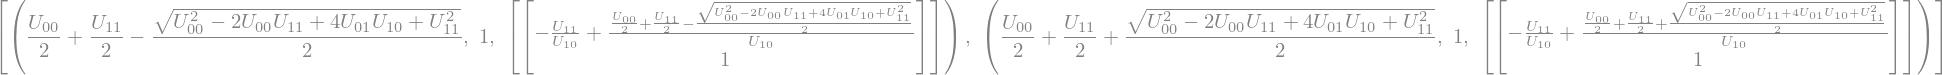

In [4]:
U.eigenvects()


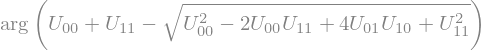

In [5]:
V=U.eigenvects()[0][0]
V
phase = sp.arg(V)
phase

In [6]:
phase.evalf(subs=dF3)

In [7]:
valeur_propre = V.evalf(subs=dF3)
valeur_propre

In [8]:
theta_value = sp.arg(valeur_propre)
theta_value

In [14]:
# 0, 1, 0, 0

#definition des états
ket0 = sp.Matrix([1,0])
ket1 = sp.Matrix([0,1])

In [15]:
α1 = sp.Symbol("α1", complex=True)
β1 = sp.Symbol("β1", complex=True)
ψ1 = α1 * ket0 + β1 * ket1 # Matrix([α,β])

α2 = sp.Symbol("α2", complex=True)
β2 = sp.Symbol("β2", complex=True)
ψ2 = α2 * ket0 + β2 * ket1 # Matrix([α,β])

α3 = sp.Symbol("α3", complex=True)
β3 = sp.Symbol("β3", complex=True)
ψ3 = α3 * ket0 + β3 * ket1 # Matrix([α,β])

In [19]:
I=sp.eye(2)
H=sp.Matrix([[1/sp.sqrt(2),1/sp.sqrt(2)], [1/sp.sqrt(2),-1/sp.sqrt(2)]])

In [28]:
# TensorProduct(ψ1, ψ2)
TensorProduct(ψ1, ψ2)

⎡α₁⋅α₂⎤
⎢     ⎥
⎢α₁⋅β₂⎥
⎢     ⎥
⎢α₂⋅β₁⎥
⎢     ⎥
⎣β₁⋅β₂⎦

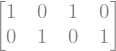

In [83]:
from sympy.physics.quantum.dagger import Dagger
Measure1over2=Dagger(TensorProduct(Matrix([1, 1]), I))
#Measure1over2 = Matrix([[ 1, 0, 1, 0],
#                    [ 0, 1, 0, 1]])
Measure1over2

In [84]:
sp.simplify(Measure1over2*TensorProduct(ψ1, ψ2))

⎡α₂⋅(α₁ + β₁)⎤
⎢            ⎥
⎣β₂⋅(α₁ + β₁)⎦

In [85]:
sp.simplify((1/sum(ψ1))*Measure1over2*TensorProduct(ψ1, ψ2))

⎡α₂⎤
⎢  ⎥
⎣β₂⎦

In [86]:
Meas1 = sp.simplify((1/ψ1.norm())*Measure1over2*TensorProduct(ψ1, ψ2))
Meas1

⎡   α₂⋅(α₁ + β₁)   ⎤
⎢──────────────────⎥
⎢   _______________⎥
⎢  ╱     2       2 ⎥
⎢╲╱  │α₁│  + │β₁│  ⎥
⎢                  ⎥
⎢   β₂⋅(α₁ + β₁)   ⎥
⎢──────────────────⎥
⎢   _______________⎥
⎢  ╱     2       2 ⎥
⎣╲╱  │α₁│  + │β₁│  ⎦

In [87]:
Meas1.subs({α1: 0,β1: 1})

⎡α₂⎤
⎢  ⎥
⎣β₂⎦

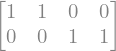

In [88]:
Measure2over2=Dagger(TensorProduct(I, Matrix([1, 1])))
#Measure2over2=Matrix([[ 1, 1, 0, 0],
#                    [ 0, 0, 1, 1]])

In [89]:
Meas2 = sp.simplify((1/ψ2.norm())*Measure2over2*TensorProduct(ψ1, ψ2))
Meas2

⎡   α₁⋅(α₂ + β₂)   ⎤
⎢──────────────────⎥
⎢   _______________⎥
⎢  ╱     2       2 ⎥
⎢╲╱  │α₂│  + │β₂│  ⎥
⎢                  ⎥
⎢   β₁⋅(α₂ + β₂)   ⎥
⎢──────────────────⎥
⎢   _______________⎥
⎢  ╱     2       2 ⎥
⎣╲╱  │α₂│  + │β₂│  ⎦

In [90]:
Meas2.subs({α2: 0,β2: 1})


⎡α₁⎤
⎢  ⎥
⎣β₁⎦

In [21]:
TensorProduct(ψ1, ψ2, ψ3)

⎡α₁⋅α₂⋅α₃⎤
⎢        ⎥
⎢α₁⋅α₂⋅β₃⎥
⎢        ⎥
⎢α₁⋅α₃⋅β₂⎥
⎢        ⎥
⎢α₁⋅β₂⋅β₃⎥
⎢        ⎥
⎢α₂⋅α₃⋅β₁⎥
⎢        ⎥
⎢α₂⋅β₁⋅β₃⎥
⎢        ⎥
⎢α₃⋅β₁⋅β₂⎥
⎢        ⎥
⎣β₁⋅β₂⋅β₃⎦

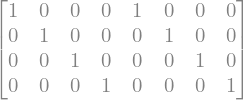

In [93]:
Measure1over3=Dagger(TensorProduct(Matrix([1, 1]), I, I))
#Measure1over3= Matrix([[ 1, 0, 0, 0, 1, 0, 0, 0],
#                    [ 0, 1, 0, 0, 0, 1, 0, 0],
#                    [ 0, 0, 1, 0, 0, 0, 1, 0],
#                    [ 0, 0, 0, 1, 0, 0, 0, 1]])

In [94]:
sp.simplify((1/sum(ψ1))*Measure1over3*TensorProduct(ψ1, ψ2, ψ3))

⎡α₂⋅α₃⎤
⎢     ⎥
⎢α₂⋅β₃⎥
⎢     ⎥
⎢α₃⋅β₂⎥
⎢     ⎥
⎣β₂⋅β₃⎦

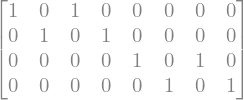

In [95]:
Measure2over3=Dagger(TensorProduct(I,Matrix([1, 1]), I))
Measure2over3

In [110]:
sp.simplify((1/ψ2.norm())*Measure2over3*TensorProduct(ψ1, ψ2, ψ3)).subs({α2: 0, β2: 1})

⎡α₁⋅α₃⎤
⎢     ⎥
⎢α₁⋅β₃⎥
⎢     ⎥
⎢α₃⋅β₁⎥
⎢     ⎥
⎣β₁⋅β₃⎦

In [101]:
Measure3over3=Dagger(TensorProduct(I, I, Matrix([1, 1])))
#Measure3over3= Matrix([[ 1, 1, 0, 0, 0, 0, 0, 0],
#                    [ 0, 0, 1, 1, 0, 0, 0, 0],
#                    [ 0, 0, 0, 0, 1, 1, 0, 0],
#                    [ 0, 0, 0, 0, 0, 0, 1, 1]])

In [111]:
sp.simplify((1/ψ3.norm())*Measure3over3*TensorProduct(ψ1, ψ2, ψ3))

⎡ α₁⋅α₂⋅(α₃ + β₃)  ⎤
⎢──────────────────⎥
⎢   _______________⎥
⎢  ╱     2       2 ⎥
⎢╲╱  │α₃│  + │β₃│  ⎥
⎢                  ⎥
⎢ α₁⋅β₂⋅(α₃ + β₃)  ⎥
⎢──────────────────⎥
⎢   _______________⎥
⎢  ╱     2       2 ⎥
⎢╲╱  │α₃│  + │β₃│  ⎥
⎢                  ⎥
⎢ α₂⋅β₁⋅(α₃ + β₃)  ⎥
⎢──────────────────⎥
⎢   _______________⎥
⎢  ╱     2       2 ⎥
⎢╲╱  │α₃│  + │β₃│  ⎥
⎢                  ⎥
⎢ β₁⋅β₂⋅(α₃ + β₃)  ⎥
⎢──────────────────⎥
⎢   _______________⎥
⎢  ╱     2       2 ⎥
⎣╲╱  │α₃│  + │β₃│  ⎦

In [112]:
sp.simplify((1/sum(ψ1))*Measure1over2*(1/sum(ψ2))*Measure2over3*TensorProduct(ψ1, ψ2, ψ3))

⎡α₃⎤
⎢  ⎥
⎣β₃⎦

In [131]:
H*ψ1

⎡√2⋅α₁   √2⋅β₁⎤
⎢───── + ─────⎥
⎢  2       2  ⎥
⎢             ⎥
⎢√2⋅α₁   √2⋅β₁⎥
⎢───── - ─────⎥
⎣  2       2  ⎦

In [143]:
sp.simplify(TensorProduct(H*ket1, H*ψ2))

⎡ α₂   β₂ ⎤
⎢ ── + ── ⎥
⎢ 2    2  ⎥
⎢         ⎥
⎢ α₂   β₂ ⎥
⎢ ── - ── ⎥
⎢ 2    2  ⎥
⎢         ⎥
⎢  α₂   β₂⎥
⎢- ── - ──⎥
⎢  2    2 ⎥
⎢         ⎥
⎢  α₂   β₂⎥
⎢- ── + ──⎥
⎣  2    2 ⎦

In [146]:
sp.simplify((1/ψ1.norm())*Measure1over2*TensorProduct(H*ψ1, H*ψ2))

⎡   α₁⋅(α₂ + β₂)   ⎤
⎢──────────────────⎥
⎢   _______________⎥
⎢  ╱     2       2 ⎥
⎢╲╱  │α₁│  + │β₁│  ⎥
⎢                  ⎥
⎢   α₁⋅(α₂ - β₂)   ⎥
⎢──────────────────⎥
⎢   _______________⎥
⎢  ╱     2       2 ⎥
⎣╲╱  │α₁│  + │β₁│  ⎦

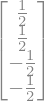

In [150]:
TensorProduct(H*ket1, H*ket0)

In [158]:
from UnitaryFunction import buildUnitaryMatrix, format_matrice
# F1 sets ouput to 0 whatever the input ==> Constant
# F2 sets ouput equals to input ==> Balanced
# F3 sets ouput to negate input ==> Balanced
# F4 sets ouput to 1 whatever the input ==> Constant
def f1(a): return False
def f2(a): return a
def f3(a): return not a
def f4(a): return True
Uf1 = buildUnitaryMatrix(f1)
Uf2 = buildUnitaryMatrix(f2)
Uf3 = buildUnitaryMatrix(f3)
Uf4 = buildUnitaryMatrix(f4)
print(format_matrice(Uf2))

Uf2 =
1, 0, 0, 0,
0, 0, 0, 1,
0, 0, 1, 0,
0, 1, 0, 0


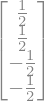

In [156]:
Uf1*TensorProduct(H*ket1, H*ket0)

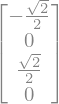

In [183]:
TensorProduct(I, H)*Uf4*TensorProduct(H*ket1, H*ket0)

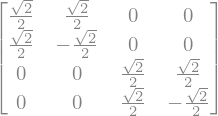

In [61]:
TensorProduct(I, H)

In [62]:
TensorProduct(I, H)*TensorProduct(ψ1, ψ2)

⎡√2⋅α₁⋅α₂   √2⋅α₁⋅β₂⎤
⎢──────── + ────────⎥
⎢   2          2    ⎥
⎢                   ⎥
⎢√2⋅α₁⋅α₂   √2⋅α₁⋅β₂⎥
⎢──────── - ────────⎥
⎢   2          2    ⎥
⎢                   ⎥
⎢√2⋅α₂⋅β₁   √2⋅β₁⋅β₂⎥
⎢──────── + ────────⎥
⎢   2          2    ⎥
⎢                   ⎥
⎢√2⋅α₂⋅β₁   √2⋅β₁⋅β₂⎥
⎢──────── - ────────⎥
⎣   2          2    ⎦

In [63]:
sp.simplify(H*ψ2)

⎡√2⋅(α₂ + β₂)⎤
⎢────────────⎥
⎢     2      ⎥
⎢            ⎥
⎢√2⋅(α₂ - β₂)⎥
⎢────────────⎥
⎣     2      ⎦

In [64]:
sp.simplify(TensorProduct(ψ1, H*ψ2))

⎡√2⋅α₁⋅(α₂ + β₂)⎤
⎢───────────────⎥
⎢       2       ⎥
⎢               ⎥
⎢√2⋅α₁⋅(α₂ - β₂)⎥
⎢───────────────⎥
⎢       2       ⎥
⎢               ⎥
⎢√2⋅β₁⋅(α₂ + β₂)⎥
⎢───────────────⎥
⎢       2       ⎥
⎢               ⎥
⎢√2⋅β₁⋅(α₂ - β₂)⎥
⎢───────────────⎥
⎣       2       ⎦

In [65]:
sp.simplify(TensorProduct(ψ1, H*ψ2) - TensorProduct(I, H)*TensorProduct(ψ1, ψ2))

In [66]:
sp.simplify(Matrix([[ 1, 0, 1, 0],
                    [ 0, 1, 0, 1]])*TensorProduct(ϕ1, H*ψ2))

⎡√2⋅(α₁ + β₁)⋅(α₂ + β₂)⎤
⎢──────────────────────⎥
⎢          2           ⎥
⎢                      ⎥
⎢√2⋅(α₁ + β₁)⋅(α₂ - β₂)⎥
⎢──────────────────────⎥
⎣          2           ⎦

In [67]:
sp.simplify(Matrix([[ 1, 1, 0, 0],
                    [ 0, 0, 1, 1]]) * TensorProduct(ψ1, H*ψ2))   #TensorProduct(I, H)*TensorProduct(ϕ1, ϕ2)



⎡√2⋅α₁⋅α₂⎤
⎢        ⎥
⎣√2⋅α₂⋅β₁⎦

In [68]:
TensorProduct(ψ1, ψ2, ψ3)

⎡α₁⋅α₂⋅α₃⎤
⎢        ⎥
⎢α₁⋅α₂⋅β₃⎥
⎢        ⎥
⎢α₁⋅α₃⋅β₂⎥
⎢        ⎥
⎢α₁⋅β₂⋅β₃⎥
⎢        ⎥
⎢α₂⋅α₃⋅β₁⎥
⎢        ⎥
⎢α₂⋅β₁⋅β₃⎥
⎢        ⎥
⎢α₃⋅β₁⋅β₂⎥
⎢        ⎥
⎣β₁⋅β₂⋅β₃⎦

In [69]:
sp.simplify(TensorProduct(I,H,H)*TensorProduct(ψ1, ψ2, ψ3))

⎡α₁⋅(α₂⋅α₃ + α₂⋅β₃ + α₃⋅β₂ + β₂⋅β₃)⎤
⎢──────────────────────────────────⎥
⎢                2                 ⎥
⎢                                  ⎥
⎢α₁⋅(α₂⋅α₃ - α₂⋅β₃ + α₃⋅β₂ - β₂⋅β₃)⎥
⎢──────────────────────────────────⎥
⎢                2                 ⎥
⎢                                  ⎥
⎢α₁⋅(α₂⋅α₃ + α₂⋅β₃ - α₃⋅β₂ - β₂⋅β₃)⎥
⎢──────────────────────────────────⎥
⎢                2                 ⎥
⎢                                  ⎥
⎢α₁⋅(α₂⋅α₃ - α₂⋅β₃ - α₃⋅β₂ + β₂⋅β₃)⎥
⎢──────────────────────────────────⎥
⎢                2                 ⎥
⎢                                  ⎥
⎢β₁⋅(α₂⋅α₃ + α₂⋅β₃ + α₃⋅β₂ + β₂⋅β₃)⎥
⎢──────────────────────────────────⎥
⎢                2                 ⎥
⎢                                  ⎥
⎢β₁⋅(α₂⋅α₃ - α₂⋅β₃ + α₃⋅β₂ - β₂⋅β₃)⎥
⎢──────────────────────────────────⎥
⎢                2                 ⎥
⎢                                  ⎥
⎢β₁⋅(α₂⋅α₃ + α₂⋅β₃ - α₃⋅β₂ - β₂⋅β₃)⎥
⎢──────────────────────────────────⎥
⎢                2                 ⎥
⎢

In [52]:
TensorProduct(ψ1, H*ψ2, H*ψ3)

⎡   ⎛√2⋅α₂   √2⋅β₂⎞ ⎛√2⋅α₃   √2⋅β₃⎞⎤
⎢α₁⋅⎜───── + ─────⎟⋅⎜───── + ─────⎟⎥
⎢   ⎝  2       2  ⎠ ⎝  2       2  ⎠⎥
⎢                                  ⎥
⎢   ⎛√2⋅α₂   √2⋅β₂⎞ ⎛√2⋅α₃   √2⋅β₃⎞⎥
⎢α₁⋅⎜───── + ─────⎟⋅⎜───── - ─────⎟⎥
⎢   ⎝  2       2  ⎠ ⎝  2       2  ⎠⎥
⎢                                  ⎥
⎢   ⎛√2⋅α₂   √2⋅β₂⎞ ⎛√2⋅α₃   √2⋅β₃⎞⎥
⎢α₁⋅⎜───── - ─────⎟⋅⎜───── + ─────⎟⎥
⎢   ⎝  2       2  ⎠ ⎝  2       2  ⎠⎥
⎢                                  ⎥
⎢   ⎛√2⋅α₂   √2⋅β₂⎞ ⎛√2⋅α₃   √2⋅β₃⎞⎥
⎢α₁⋅⎜───── - ─────⎟⋅⎜───── - ─────⎟⎥
⎢   ⎝  2       2  ⎠ ⎝  2       2  ⎠⎥
⎢                                  ⎥
⎢   ⎛√2⋅α₂   √2⋅β₂⎞ ⎛√2⋅α₃   √2⋅β₃⎞⎥
⎢β₁⋅⎜───── + ─────⎟⋅⎜───── + ─────⎟⎥
⎢   ⎝  2       2  ⎠ ⎝  2       2  ⎠⎥
⎢                                  ⎥
⎢   ⎛√2⋅α₂   √2⋅β₂⎞ ⎛√2⋅α₃   √2⋅β₃⎞⎥
⎢β₁⋅⎜───── + ─────⎟⋅⎜───── - ─────⎟⎥
⎢   ⎝  2       2  ⎠ ⎝  2       2  ⎠⎥
⎢                                  ⎥
⎢   ⎛√2⋅α₂   √2⋅β₂⎞ ⎛√2⋅α₃   √2⋅β₃⎞⎥
⎢β₁⋅⎜───── - ─────⎟⋅⎜───── + ─────⎟⎥
⎢   ⎝  2       2  ⎠ ⎝  2       2  ⎠⎥
⎢

In [53]:
sp.simplify(TensorProduct(I,H,H)*TensorProduct(ψ1, ψ2, ψ3) - TensorProduct(ψ1, H*ψ2, H*ψ3))

In [54]:
sp.simplify(Matrix([[ 1, 1, 1, 1, 0, 0, 0, 0],
                    [ 0, 0, 0, 0, 1, 1, 1, 1]
                   ])*TensorProduct(ψ1, H*ψ2, H*ψ3))

⎡2⋅α₁⋅α₂⋅α₃⎤
⎢          ⎥
⎣2⋅α₂⋅α₃⋅β₁⎦

In [55]:
2*α2*α3*TensorProduct(ψ1)

⎡2⋅α₁⋅α₂⋅α₃⎤
⎢          ⎥
⎣2⋅α₂⋅α₃⋅β₁⎦

In [56]:
sp.simplify(Matrix([[ 1, 0, 0, 0, 1, 0, 0, 0],
                    [ 0, 1, 0, 0, 0, 1, 0, 0],
                    [ 0, 0, 1, 0, 0, 0, 1, 0],
                    [ 0, 0, 0, 1, 0, 0, 0, 1]])*TensorProduct(ψ1, H*ψ2, H*ψ3))

⎡(α₁ + β₁)⋅(α₂ + β₂)⋅(α₃ + β₃)⎤
⎢─────────────────────────────⎥
⎢              2              ⎥
⎢                             ⎥
⎢(α₁ + β₁)⋅(α₂ + β₂)⋅(α₃ - β₃)⎥
⎢─────────────────────────────⎥
⎢              2              ⎥
⎢                             ⎥
⎢(α₁ + β₁)⋅(α₂ - β₂)⋅(α₃ + β₃)⎥
⎢─────────────────────────────⎥
⎢              2              ⎥
⎢                             ⎥
⎢(α₁ + β₁)⋅(α₂ - β₂)⋅(α₃ - β₃)⎥
⎢─────────────────────────────⎥
⎣              2              ⎦

In [57]:
TensorProduct(H*ψ2, H*ψ3)

⎡⎛√2⋅α₂   √2⋅β₂⎞ ⎛√2⋅α₃   √2⋅β₃⎞⎤
⎢⎜───── + ─────⎟⋅⎜───── + ─────⎟⎥
⎢⎝  2       2  ⎠ ⎝  2       2  ⎠⎥
⎢                               ⎥
⎢⎛√2⋅α₂   √2⋅β₂⎞ ⎛√2⋅α₃   √2⋅β₃⎞⎥
⎢⎜───── + ─────⎟⋅⎜───── - ─────⎟⎥
⎢⎝  2       2  ⎠ ⎝  2       2  ⎠⎥
⎢                               ⎥
⎢⎛√2⋅α₂   √2⋅β₂⎞ ⎛√2⋅α₃   √2⋅β₃⎞⎥
⎢⎜───── - ─────⎟⋅⎜───── + ─────⎟⎥
⎢⎝  2       2  ⎠ ⎝  2       2  ⎠⎥
⎢                               ⎥
⎢⎛√2⋅α₂   √2⋅β₂⎞ ⎛√2⋅α₃   √2⋅β₃⎞⎥
⎢⎜───── - ─────⎟⋅⎜───── - ─────⎟⎥
⎣⎝  2       2  ⎠ ⎝  2       2  ⎠⎦

In [58]:
sp.simplify(Matrix([[ 1, 0, 0, 0, 1, 0, 0, 0],
                    [ 0, 1, 0, 0, 0, 1, 0, 0],
                    [ 0, 0, 1, 0, 0, 0, 1, 0],
                    [ 0, 0, 0, 1, 0, 0, 0, 1]])*TensorProduct(ψ1, H*ψ2, H*ψ3))

⎡(α₁ + β₁)⋅(α₂ + β₂)⋅(α₃ + β₃)⎤
⎢─────────────────────────────⎥
⎢              2              ⎥
⎢                             ⎥
⎢(α₁ + β₁)⋅(α₂ + β₂)⋅(α₃ - β₃)⎥
⎢─────────────────────────────⎥
⎢              2              ⎥
⎢                             ⎥
⎢(α₁ + β₁)⋅(α₂ - β₂)⋅(α₃ + β₃)⎥
⎢─────────────────────────────⎥
⎢              2              ⎥
⎢                             ⎥
⎢(α₁ + β₁)⋅(α₂ - β₂)⋅(α₃ - β₃)⎥
⎢─────────────────────────────⎥
⎣              2              ⎦